# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Preparation

In [2]:
df = pd.read_csv('data/StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## Descriiption

- Hours_Studied:	Number of hours spent studying per week.
- Attendance:	Percentage of classes attended.
- Parental_Involvement: Level of parental involvement in the student's education (Low, Medium, High).
- Access_to_Resources:	Availability of educational resources (Low, Medium, High).
- Extracurricular_Activities:	Participation in extracurricular activities (Yes, No).
- Sleep_Hours:	Average number of hours of sleep per night.
- Previous_Scores:	Scores from previous exams.
- Motivation_Level:	Student's level of motivation (Low, Medium, High).
- Internet_Access:	Availability of internet access (Yes, No).
- Tutoring_Sessions:	Number of tutoring sessions attended per month.
- Family_Income:	Family income level (Low, Medium, High).
- Teacher_Quality:	Quality of the teachers (Low, Medium, High).
- School_Type:	Type of school attended (Public, Private).
- Peer_Influence:	Influence of peers on academic performance (Positive, Neutral, Negative).
- Physical_Activity:	Average number of hours of physical activity per week.
- Learning_Disabilities:	Presence of learning disabilities (Yes, No).
- Parental_Education_Level:	Highest education level of parents (High School, College, Postgraduate).
- Distance_from_Home:	Distance from home to school (Near, Moderate, Far).
- Gender:	Gender of the student (Male, Female).
- Exam_Score:	Final exam score.

## Cleaning data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Terlihat bahwa missing value dari data tersebut semuanya bertipe `object` dan persentasenya hanya sedikit. Oleh karena itu, nilai yang akan digunakan untuk mengisinya adalah `mode` dan tidak akan dihapus.

In [5]:
df[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']].describe()

,Teacher_Quality,Parental_Education_Level,Distance_from_Home
count,6529,6517,6540
unique,3,3,3
top,Medium,High School,Near
freq,3925,3223,3884


In [6]:
missing_cols = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']
for col in missing_cols:
    print(df[col].value_counts(), '\n')

Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64 

Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64 

Distance_from_Home
Near        3884
Moderate    1998
Far          658
Name: count, dtype: int64 



In [7]:
# mengisi data kosong dengan modus
for col in missing_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


Data maksimal pada `Exam_Score` adalah 101. Hal tersebut menunjukkan terdapat data input yang salah karena seharusnya data maksimalnya adalah 100. Oleh karena itu, data tersebut akan diubah menjadi 100.

In [10]:
df['Exam_Score'] = df['Exam_Score'].apply(lambda x: 100 if x > 100 else x)

# EDA

## Univariate Analylsis



In [11]:
num_cols = df.select_dtypes(exclude='object').columns
obj_cols = df.select_dtypes(include='object').columns

print(num_cols)
print(obj_cols)

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')
Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')


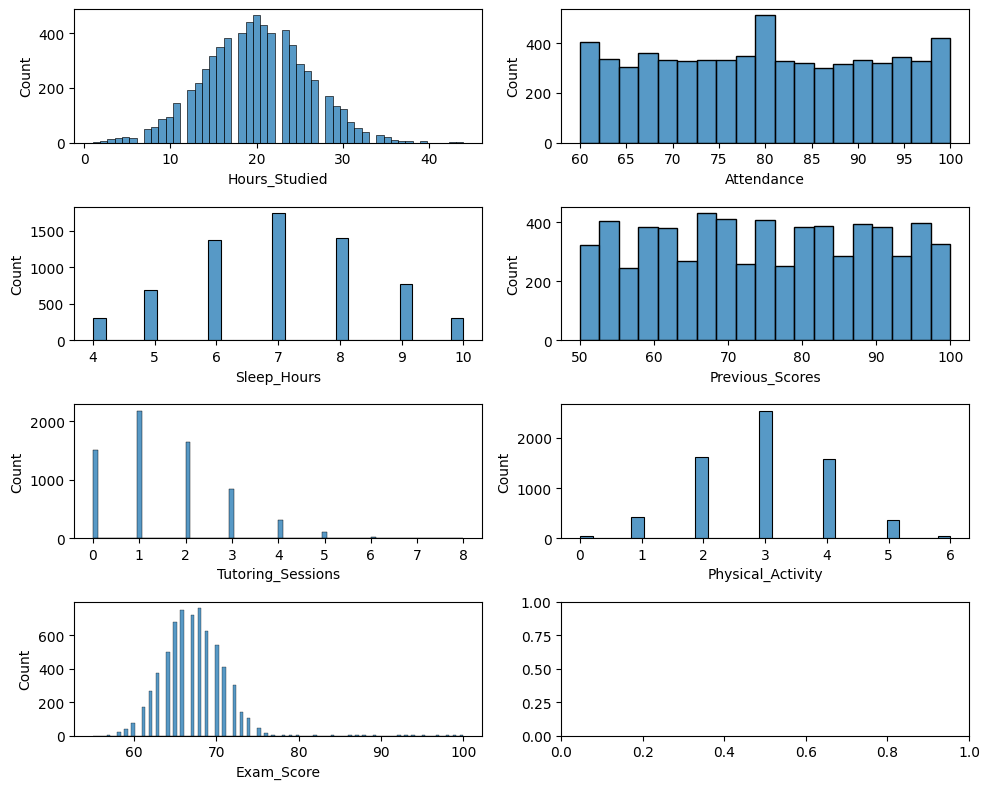

In [12]:
fig, ax = plt.subplots(4, 2, figsize=(10, 8))

for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, ax=ax[i//2, i%2])

plt.tight_layout()
plt.show()

Hasil visualisasi data menunjukkan bahwa sebagian besar data berdistribusi normal. Hal tersebut terlihat dari diagram yang berbentuk menyerupai lonceng. Namun, kolom `Attendance` dan `Previous_Scores` berdistribusi uniform.

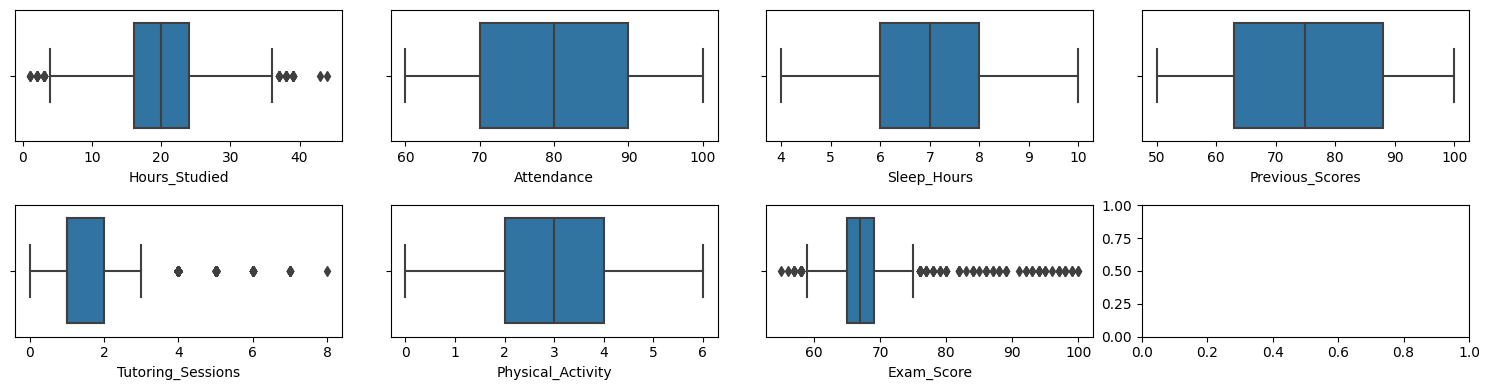

In [13]:
fig, ax = plt.subplots(2, 4, figsize=(15, 4))

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x=col, ax=ax[i//4, i%4])

plt.tight_layout()
plt.show()

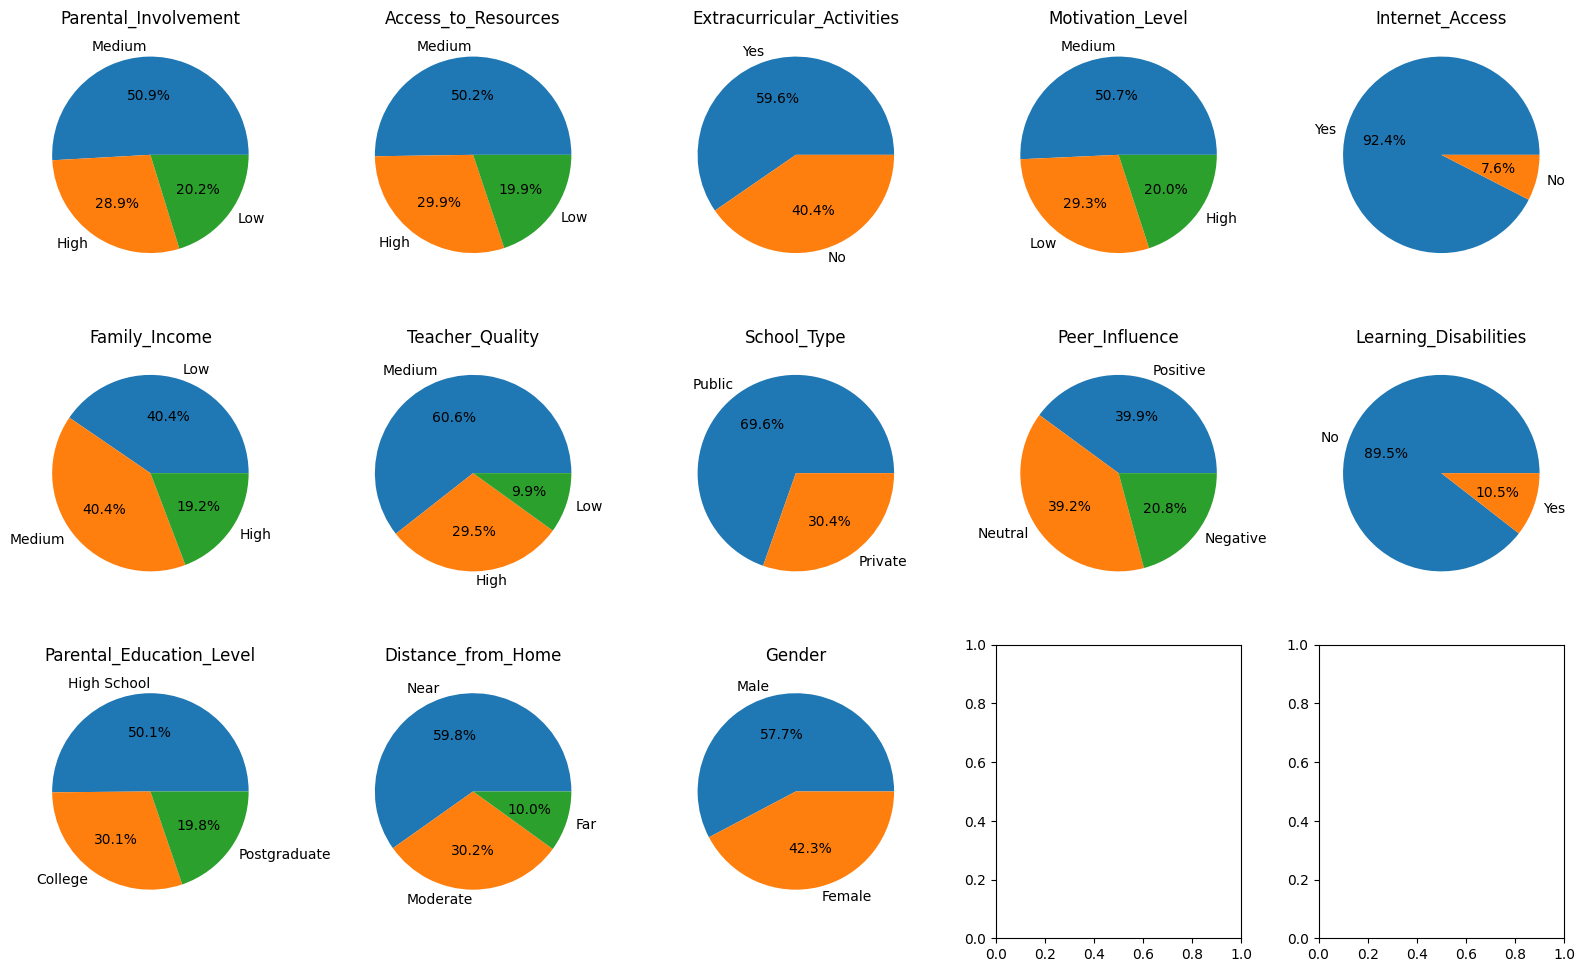

In [14]:
# cols = ['Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities', 'Gender', 'School_Type']

fig, ax = plt.subplots(3, 5, figsize=(16, 10))

for i, col in enumerate(obj_cols):
    data = df[col].value_counts()

    ax[i//5, i%5].pie(data, labels=data.index, autopct='%1.1f%%')
    ax[i//5, i%5].set_title(col)

plt.tight_layout()
plt.show()

## Multivariate Analysis

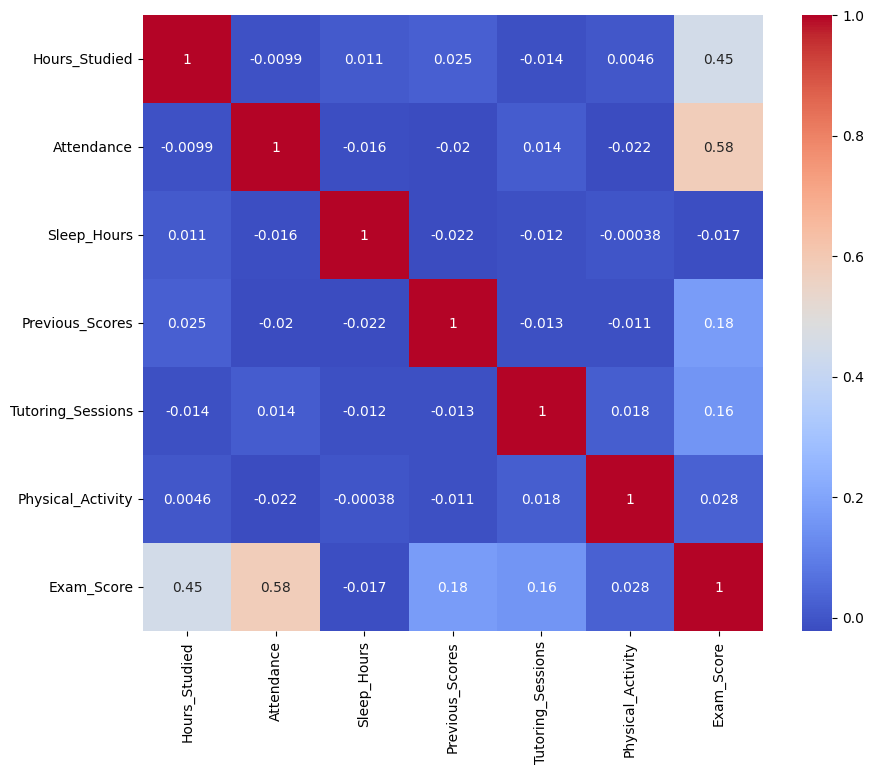

In [15]:
corr = df.select_dtypes('number').corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.show()

Hubungan antara nilai ujian dengan lama belajar dan kehadiran memiliki nilai korelasi sedang. Namun, hubungan anatar kolom lainnya bernilai rendah.

In [16]:
# berbagai faktor pada data kategorik dikategorikan
internal = ['Motivation_Level', 'Learning_Disabilities', 'Gender']
external = ['Access_to_Resources', 'Extracurricular_Activities', 'Internet_Access']
family = ['Parental_Involvement', 'Family_Income', 'Parental_Education_Level']
social = ['Peer_Influence', 'Distance_from_Home', 'Teacher_Quality', 'School_Type']

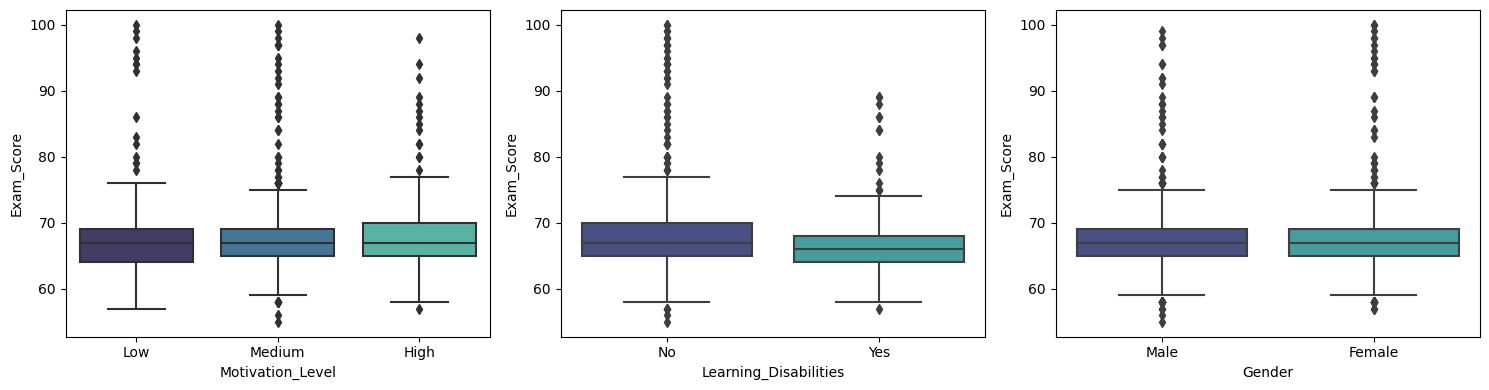

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

for i, col in enumerate(internal):
    sns.boxplot(data=df, x=col, y='Exam_Score', ax=ax[i], palette='mako')

plt.tight_layout()

-  Siswa dengan tingkat motivasi rendah atau sedang lebih banyak mencapai nilai ujian tinggi (>90) dibanding siswa dengan tingkat motivasi tinggi.
- Siswa yang tidak memiliki kesulitan belajar memperoleh nilai ujian lebih tinggi secara keseluruhan dibanding siswa yang memiliki kesulitan belajar.
- Tidak terlihat perbedaan signifikan antara nilai ujian siswa berdasarkan gender.

In [44]:
df.groupby('Motivation_Level')['Exam_Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Motivation_Level,,,,,,,,
High,1319.0,67.704321,3.876966,57.0,65.0,67.0,70.0,98.0
Low,1937.0,66.751678,3.953733,57.0,64.0,67.0,69.0,100.0
Medium,3351.0,67.330648,3.827303,55.0,65.0,67.0,69.0,100.0


In [45]:
df['Exam_Score'].mean()

67.23550779476312

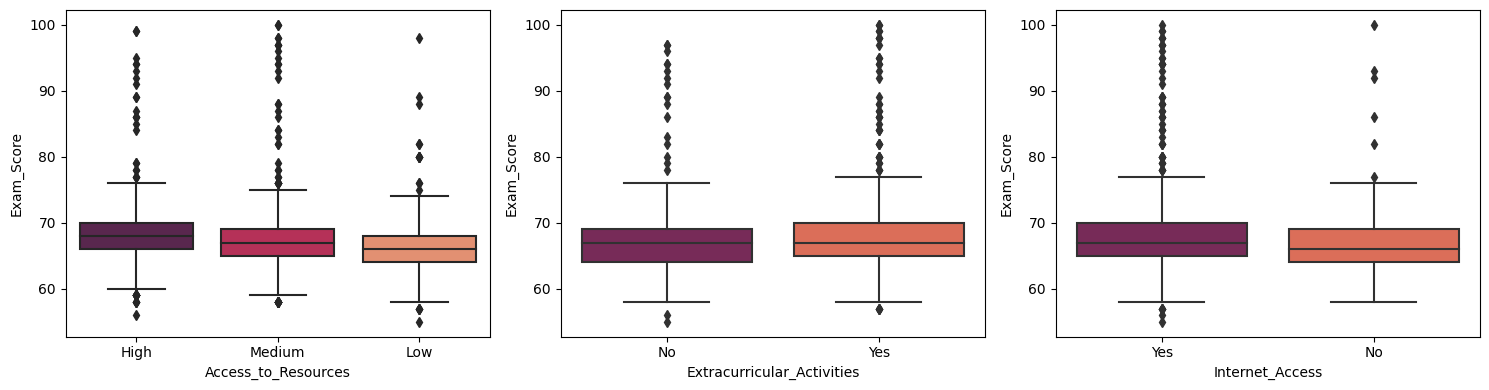

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

for i, col in enumerate(external):
    sns.boxplot(data=df, x=col, y='Exam_Score', ax=ax[i], palette='rocket')

plt.tight_layout()

- Siswa dengan akses **sedang** atau **rendah** pada sumber belajar lebih banyak memperoleh nilai ujian yang baik dibanding siswa dengan akses rendah. Artinya, siswa yang memiliki akses lebih baik terhadap sumber daya cenderung memiliki peluang lebih tinggi untuk mencapai nilai maksimal.
- Siswa yang mengikuti kegiatan ekstrakurikuler cenderung memperoleh nilai ujian yang lebih baik dibanding siswa yang tidak mengikuti kegiatan ekstrakurikuler.
- Terlihat jelas bahwa akses internet memberikan kontribusi untuk membantu siswa memperoleh nilai yang lebih tinggi.

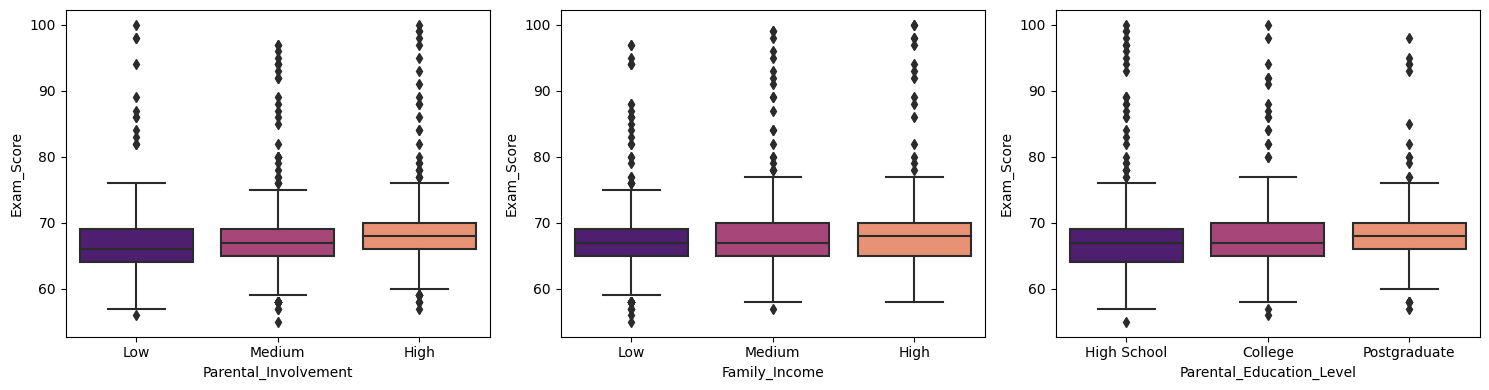

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

for i, col in enumerate(family):
    sns.boxplot(data=df, x=col, y='Exam_Score', ax=ax[i], palette='magma')

plt.tight_layout()

- Siswa dengan keterlibatan orang tua yang rendah cenderung memperoleh nilai tinggi lebih sedikit dibanding siswa dengan keterlibatan orang tua yang sedang atau tinggi. Hal tersebut menunjukkan pentingnya keterlibatan orang tua dalam proses belajar siswa.
- Sama seperti keterlibatan orang tua, siswa dari keluarga berpendapatan sedang atau tinggi cenderung lebih sering mendapatkan nilai ujian yang tinggi.
- Meskipun siswa dengan orang tua yang memiliki tingkat pendidikan Postgraduate memperoleh nilai tinggi lebih sedikit, tetapi nilai median yang diperoleh lebih tinggi dibanding tingkat pendidikan lainnya.

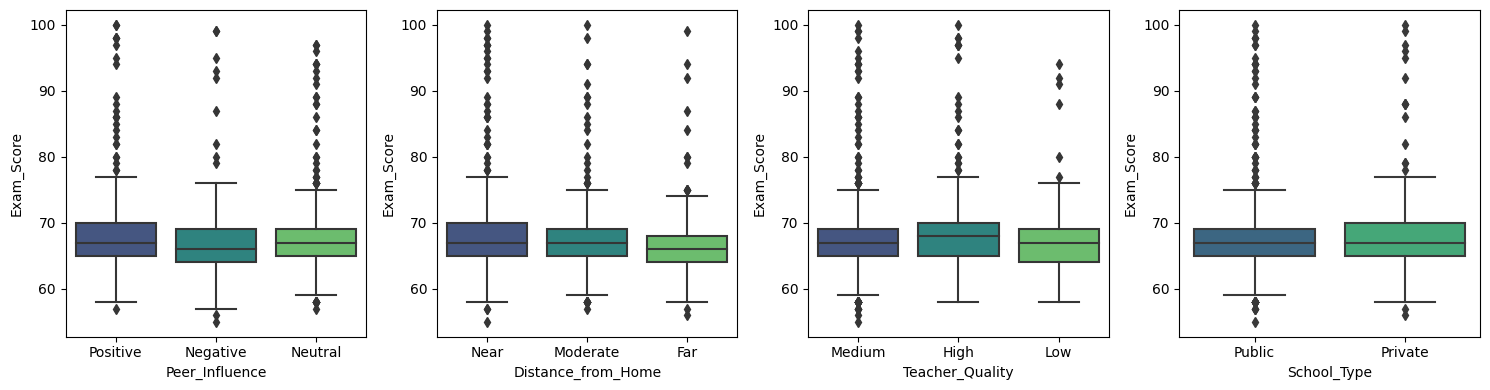

In [20]:
fig, ax = plt.subplots(1, 4, figsize=(15, 4))

for i, col in enumerate(social):
    sns.boxplot(data=df, x=col, y='Exam_Score', ax=ax[i], palette='viridis')

plt.tight_layout()

- Siswa yang terpengaruh negatif oleh teman sebaya cenderung cenderung lebih sulit untuk memperoleh nilai tinggi. Selain itu juga terlihat bahwa median nilai ujiannya lebih rendah dibanding perngaruh netral atau positif dari teman sebaya.
- Sama seperti pada pengaruh teman sebaya, siswa degan jarak dari rumah ke sekolah yang jauh lebih sulit untuk memperoleh nilai tinggi. Terlihat juga bahwa median nilai ujiannya lebih rendah dibanding siswa dengan jarak dari rumah yang dekat atau sedang.
- Kualitas guru juga sangat berpengaruh terhadap nilai ujian yang dicapai siswa. Siswa dengan guru yang berkualitas rendah lebih sedikit yang memperoleh nilai tinggi.
- Tipe sekolah publik maupun privat tidak memberikan perbedaan signifikan terhadap nilai ujian siswa.

# Feature Encoding

In [21]:
level = {'Low': 0, 'Medium': 1, 'High': 2}
influence = {'Positive': 2, 'Neutral': 1, 'Negative': 0}
distance = {'Near': 0, 'Moderate': 1, 'Far': 2}
education = {'High School': 0, 'College': 1, 'Postgraduate': 2}

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_clean = df.copy()

level_col = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality']
bool_col = ['Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities', 'Gender', 'School_Type']

for col in level_col:
    df_clean[col] = df_clean[col].map(level)

for col in bool_col:
    df_clean[col] = le.fit_transform(df_clean[col])

df_clean['Peer_Influence'] = df_clean['Peer_Influence'].map(influence)
df_clean['Distance_from_Home'] = df_clean['Distance_from_Home'].map(distance)
df_clean['Parental_Education_Level'] = df_clean['Parental_Education_Level'].map(education)

# Machine Learning Model

## Split Data

In [23]:
from sklearn.model_selection import train_test_split

X = df_clean.drop('Exam_Score', axis=1)
y = df_clean['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Normalization

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modeling

## Regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [26]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
]

In [27]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    result = []

    for model_name, model in models:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)

        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        result.append([model_name, train_rmse, test_rmse, train_mae, test_mae, train_r2, test_r2])

    result_df = pd.DataFrame(result, columns=['Model', 'Train RMSE', 'Test RMSE', 'Train MAE', 'Test MAE', 'Train R2', 'Test R2'])
    return result_df

In [28]:
evaluate_model(models, X_train, X_test, y_train, y_test)

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R2,Test R2
0,Linear Regression,2.084241,1.799411,0.493515,0.444210,0.717338,0.770933
1,Decision Tree,0.000000,3.100315,0.000000,1.614977,1.000000,0.319993
2,Gradient Boosting,1.981749,1.933790,0.744620,0.786158,0.744454,0.735442


Berdasarkan hasil evaluasi, kandidat model yang paling optimal untuk dipilih adalah Linear Regression dan Gradient Boosting. Namun karena hasil evaluasi pada model Gradient Boosting lebih stabil, maka dipilih model Gradient Boosting yang selanjutnya akan dilakukan tuning parameter.

In [29]:
from sklearn.model_selection import RandomizedSearchCV

gbr = GradientBoostingRegressor()

params = {
    'n_estimators': [i for i in range(300, 501, 50)],
    'learning_rate': [0.05, 0.075, 0.1, 0.125, 0.25],
    # 'max_depth': [i for i in range(1, 7)]
}

random_search = RandomizedSearchCV(
    estimator=gbr, 
    param_distributions=params, 
    n_iter=100, cv=3, verbose=2, 
    scoring='neg_mean_squared_error',
    n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

print('Best params:', random_search.best_params_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best params: {'n_estimators': 350, 'learning_rate': 0.05}


In [41]:
models = [
    ('Random', GradientBoostingRegressor(**random_search.best_params_)),
    ('Default', GradientBoostingRegressor())
    ]

evaluate_model(models, X_train, X_test, y_train, y_test)

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R2,Test R2
0,Random,1.861578,1.89648,0.617209,0.675949,0.774506,0.745552
1,Default,1.981749,1.93379,0.744620,0.786158,0.744454,0.735442


## Clustering

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [32]:
from sklearn.preprocessing import MinMaxScaler

self_factors = ['Hours_Studied', 'Motivation_Level', 'Physical_Activity', 'Learning_Disabilities', 'Sleep_Hours', 'Gender']
X = df_clean[self_factors]
X_scaled = MinMaxScaler().fit_transform(X)

In [33]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

In [34]:
scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores.append(score)

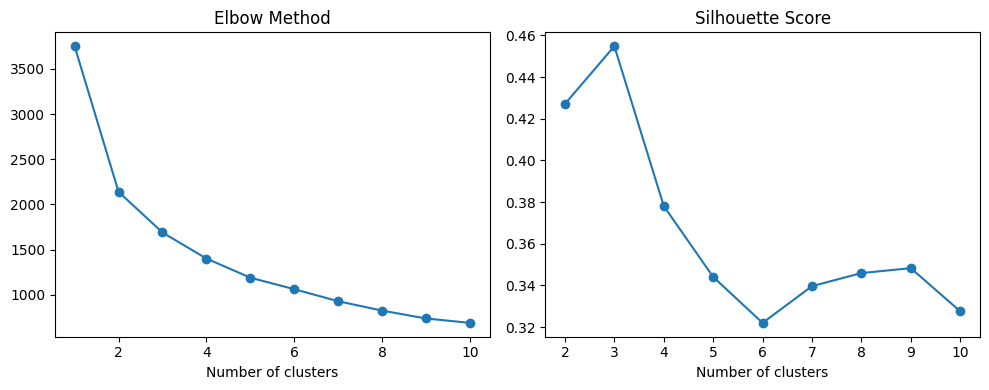

In [35]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')

plt.tight_layout()
plt.show()

Dari hasil evaluasi menggunakan **Elbow Method**, penurunan mulai melambat dari kluster ke-5. Hal tersebut mengindikasikan bahwa data yang dibagi menjadi 5 kluster merupakan suatu hal yang dapat dipertimbangkan. Namun dari **Silhoutte Score**, pembagian data menjadi 3 kluster memiliki skor tertinggi. Dari 2 hasil evaluasi tersebut, dipilih pengelompokkan menjadi 3 kluster karena dari hasil evaluasi berdasarkan nilai WCSS pada Elbow Method, selisih antara kluster 3 dan kluster 4 tidak berbeda signifikan.

In [36]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X_scaled)

In [37]:
df['Cluster'] = labels
df['Cluster'].value_counts()

Cluster
0    3428
1    2484
2     695
Name: count, dtype: int64

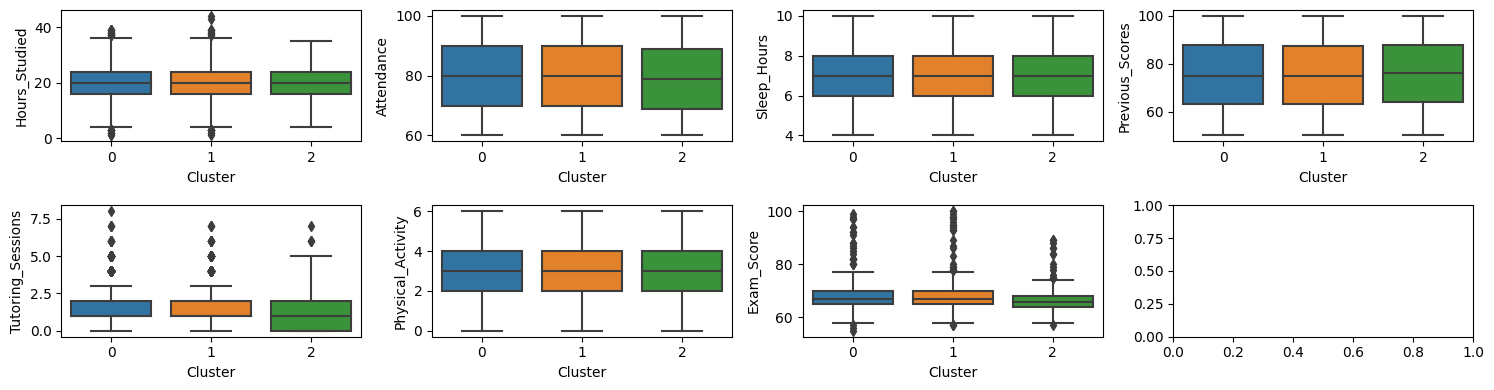

In [38]:
fig, ax = plt.subplots(2, 4, figsize=(15, 4))

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x='Cluster', y=col, ax=ax[i//4, i%4])
    
plt.tight_layout()
plt.show()

In [39]:
df[['Hours_Studied', 'Exam_Score', 'Cluster']].groupby('Cluster').describe().T

Cluster                        0            1           2
Hours_Studied count  3428.000000  2484.000000  695.000000
              mean     19.985414    20.031804   19.723741
              std       5.994192     6.043555    5.781188
              min       1.000000     1.000000    4.000000
              25%      16.000000    16.000000   16.000000
              50%      20.000000    20.000000   20.000000
              75%      24.000000    24.000000   24.000000
              max      39.000000    44.000000   35.000000
Exam_Score    count  3428.000000  2484.000000  695.000000
              mean     67.334014    67.369565   66.270504
              std       3.704056     4.048176    4.068071
              min      55.000000    57.000000   57.000000
              25%      65.000000    65.000000   64.000000
              50%      67.000000    67.000000   66.000000
              75%      70.000000    70.000000   68.000000
              max      99.000000   100.000000   89.000000

- Kluster 1 memiliki distribusi jam belajar paling beragam serta memiliki jam maksimal tertinggi dibanding kluster lainnya. Selain itu, nilai ujian pada kluster 1 memiliki rerata nial ujian tertinggi.
- Distribusi jam belajar pada kluster 2 tidak memiliki outlier. Nilai ujian pada kluster 2 cenderung mendapatkan nilai ujian terendah.

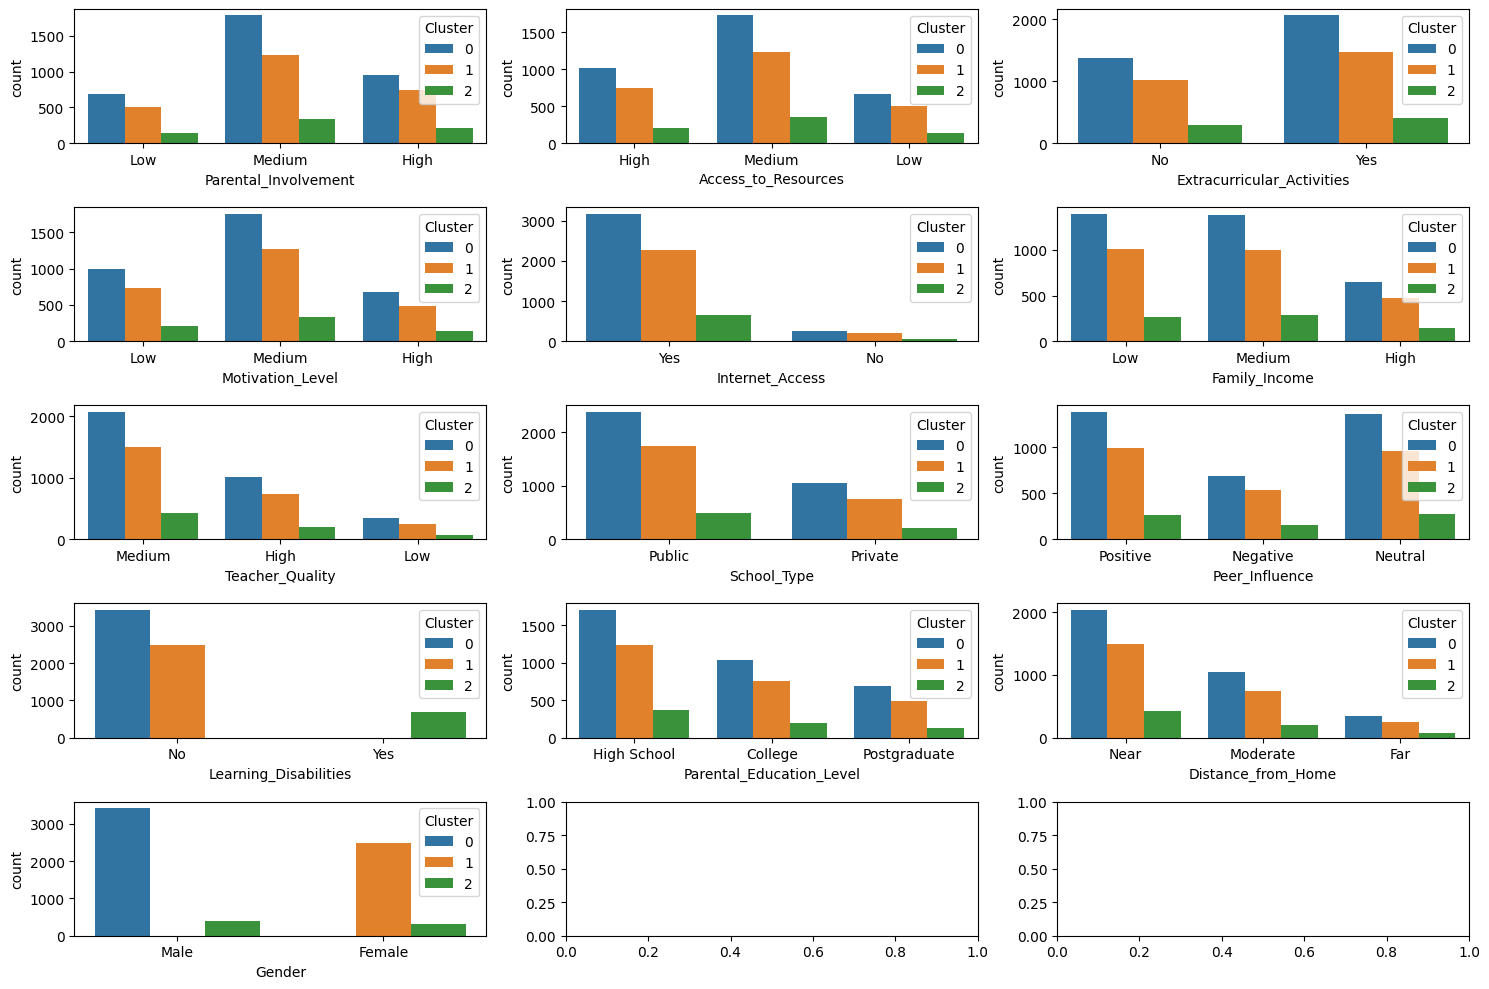

In [40]:
fig, ax = plt.subplots(5, 3, figsize=(15, 10))

for i, col in enumerate(obj_cols):
    sns.countplot(data=df, x=col, hue='Cluster', ax=ax[i//3, i%3])

plt.tight_layout()
plt.show()

- Klaster 0  mayoritas laki-laki dan klaster 1 mayoritas perempuan.
- Klaster 2 semuanya memiliki keterbatasan belajar, sedangkan klaster 0 dan 1 tidak memiliki keterbatasan belajar